# Run main file to get outputs

* Check main.py for how the algorithms are selected
* Works for 2D or 3D mazes
* Intermediate outputs are for display purposes
* Outputs are saved as txt files

In [1]:
%run -t main.py

Using algorithm :	 A*
Dimension of maze is :	 8x8x0
Start coordinate :	 (0, 0, 0)
End coordinate :	 (8, 8, 0)

 Running A* algorithm 

HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)
HEAPIFY-O(n)

 Found 


IPython CPU timings (estimated):
  User   :       0.02 s.
  System :       0.00 s.
Wall time:       0.02 s.


# Auxiliary functions to read input, output and intermediates

* read input.txt to initialize maze
* read intermediate.txt for animation
* read output.txt as the final solution
* made for 2D displays only (probably will expand for 3D sometime in the future)

In [2]:
from display import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

alg, bbox_dim, start_coord, end_coord, nodes_x, nodes_y, nodes_z = input_file_parser()
cost, steps, soln_x, soln_y, soln_z = output_file_parser()

Using algorithm :	 A*
Dimension of maze is :	 8x8x0


In [3]:
import pickle
with open("explored_x.txt", "rb") as fp:
    explored_x = pickle.load(fp)
    
with open("explored_y.txt", "rb") as fp:
    explored_y = pickle.load(fp)
    
with open("queued_x.txt", "rb") as fp:
    queued_x = pickle.load(fp)
    
with open("queued_y.txt", "rb") as fp:
    queued_y = pickle.load(fp)

# Animation for graph searching

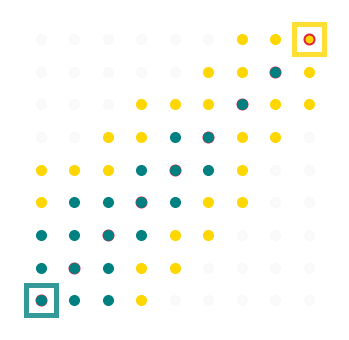

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams['animation.html'] = 'jshtml'

nfr = len(explored_x)-1     # Number of actions taken
fps = 5      # Frame per sec Speed of simulation 

fig = plt.figure(figsize=[6, 6])
ax = fig.add_subplot()
ax.set_xlim(0-1, bbox_dim[0]+1)
ax.set_ylim(0-1, bbox_dim[1]+1)
ax.axis('off')

sct_board, = ax.plot(nodes_x, nodes_y, "o", markersize=10, c='lightgray', alpha=0.1)
sct_start, = ax.plot(start_coord[0], start_coord[1], "s", markersize=30, c='teal', alpha=0.8, fillstyle='none', markeredgewidth=5)
sct_end, = ax.plot(end_coord[0], end_coord[1], "s", markersize=30, c='gold', alpha=0.8, fillstyle='none', markeredgewidth=5)

sct_1, = ax.plot([], [], "o", markersize=10, c='teal', zorder=10)
sct_2, = ax.plot([], [], "o", markersize=10, c='gold')
sct_soln, = ax.plot([], [], "o", markersize=10, c='crimson', alpha=0.9, fillstyle='none', markeredgewidth=2)

def update(ifrm, e_x, e_y, q_x, q_y, soln_x, soln_y):
    sct_2.set_data(q_x[ifrm], q_y[ifrm])
    sct_1.set_data(e_x[ifrm], e_y[ifrm])
    if ifrm == nfr-1:
        sct_soln.set_data(soln_x, soln_y)
    
ani = animation.FuncAnimation(fig, update, nfr, fargs=(explored_x, explored_y, queued_x, queued_y, soln_x, soln_y), interval=300)
HTML(ani.to_jshtml())

In [5]:
ani.save('ASTAR.gif', writer='pillow', fps=5)
Image(url='ASTAR.gif')

# Maze creation

In [ ]:
#create a 2D world with all 18 possible actions

count = 0
for i in range(8+1):
    for j in range(8+1):
        print(str(i)+' '+str(j)+' '+str(0), end=' ')
        for k in range(18):
            print(str(k+1), end=' ')
        count = count + 1
        print()
count